<img style="float: right; width: 40%; height: auto;" src="./Data/Data_Ink.png"> 
# Trend Visualization Example  
  
---  

### By: Heather M. Steich, M.S.
### Date: October 14$^{th}$, 2017
### Written in: Python 3.4.5
---  
  
---  

In [1]:
import sys
print(sys.version)

3.4.5 |Anaconda custom (64-bit)| (default, Jul  5 2016, 14:53:07) [MSC v.1600 64 bit (AMD64)]


---  
  
## Background  

You just purchased a tiny pastry shop that was open 24 hours a day, Monday through Friday. You see potential for it to be more profitable with some changes to how it’s managed.
  
## *-Part #1-*  

Attached is data on the number of people that came into the pastry shop, by hour, the last week it was open. For example: Hour_of_day = 1 is the hour from 1:00:00am – 1:59:59am. Also included in the dataset is the average amount spent by each customer who came in to the pastry shop during the corresponding time interval. 

In [2]:
## LOAD LIBRARIES

# Data wrangling & processing: 
import numpy as np
import pandas as pd

# Plotting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## ESTABLISH PLOT FORMATTING

#mpl.rcdefaults()  # Resets plot defaults

def plt_format():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (16, 10)
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.markerscale'] = 4
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 16
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['axes.linewidth'] = 1

#plt.rcParams.keys()  # Available rcParams
plt_format()

In [4]:
## LOAD DATA:

# Read in the CSV file:
df = pd.read_csv("./Data/Hourly_business_data.csv")


# Print shapes:
print('DF Shape:', df.shape)
print('DF Column Names:', df.columns)

DF Shape: (119, 4)
DF Column Names: Index(['Date Time', 'Hour of Day', 'Number_of_customers',
       'Average_revenue_per_customer'],
      dtype='object')


In [5]:
## PRINT A PREVIEW OF THE DATAFRAME:

df.head()

,Date Time,Hour of Day,Number_of_customers,Average_revenue_per_customer
0,11/3/14 1:00 AM,1,4,5.35
1,11/3/14 2:00 AM,2,2,3.28
2,11/3/14 3:00 AM,3,2,5.84
3,11/3/14 4:00 AM,4,3,3.56
4,11/3/14 5:00 AM,5,4,4.61


In [6]:
## ADD A NEW COLUMN WITH THE REVENUE BY HOUR:

df['Revenue_by_hour'] = np.multiply(df.Number_of_customers, df.Average_revenue_per_customer)
df.head()

,Date Time,Hour of Day,Number_of_customers,Average_revenue_per_customer,Revenue_by_hour
0,11/3/14 1:00 AM,1,4,5.35,21.40
1,11/3/14 2:00 AM,2,2,3.28,6.56
2,11/3/14 3:00 AM,3,2,5.84,11.68
3,11/3/14 4:00 AM,4,3,3.56,10.68
4,11/3/14 5:00 AM,5,4,4.61,18.44


In [7]:
df.tail()

,Date Time,Hour of Day,Number_of_customers,Average_revenue_per_customer,Revenue_by_hour
114,11/7/14 7:00 PM,19,15,2.69,40.35
115,11/7/14 8:00 PM,20,18,5.02,90.36
116,11/7/14 9:00 PM,21,14,5.73,80.22
117,11/7/14 10:00 PM,22,14,4.71,65.94
118,11/7/14 11:00 PM,23,3,2.83,8.49


In [8]:
df.dtypes

Date Time                        object
Hour of Day                       int64
Number_of_customers               int64
Average_revenue_per_customer    float64
Revenue_by_hour                 float64
dtype: object

In [9]:
## CONVERT THE DATE COLUMN TO DATETIME OBJECT:

df['Date Time'] = pd.to_datetime(df['Date Time'])

---  
  
### **Question #1(a):**  

What trend(s) do you see in consumer behavior? Assume you are explaining it to someone who may not be data-savvy. Include your evidence.

In [10]:
## GET DATAFRAME STATISTICS:

df.describe()

,Hour of Day,Number_of_customers,Average_revenue_per_customer,Revenue_by_hour
count,119.000000,119.000000,119.000000,119.000000
mean,12.403361,22.168067,4.220336,101.766723
std,6.899176,17.357809,1.145264,93.163274
min,1.000000,1.000000,1.600000,3.200000
25%,6.500000,5.500000,3.285000,18.885000
50%,12.000000,21.000000,4.520000,78.000000
75%,18.000000,30.000000,5.100000,147.000000
max,24.000000,74.000000,6.180000,401.820000


In [11]:
df['Date Time'].min()

Timestamp('2014-11-03 01:00:00')

In [12]:
df['Date Time'].max()

Timestamp('2014-11-08 00:00:00')

In [13]:
df.iloc[94:97, :]

,Date Time,Hour of Day,Number_of_customers,Average_revenue_per_customer,Revenue_by_hour
94,2014-11-06 23:00:00,23,5,3.73,18.65
95,2014-11-08 00:00:00,24,5,3.51,17.55
96,2014-11-07 01:00:00,1,2,3.19,6.38


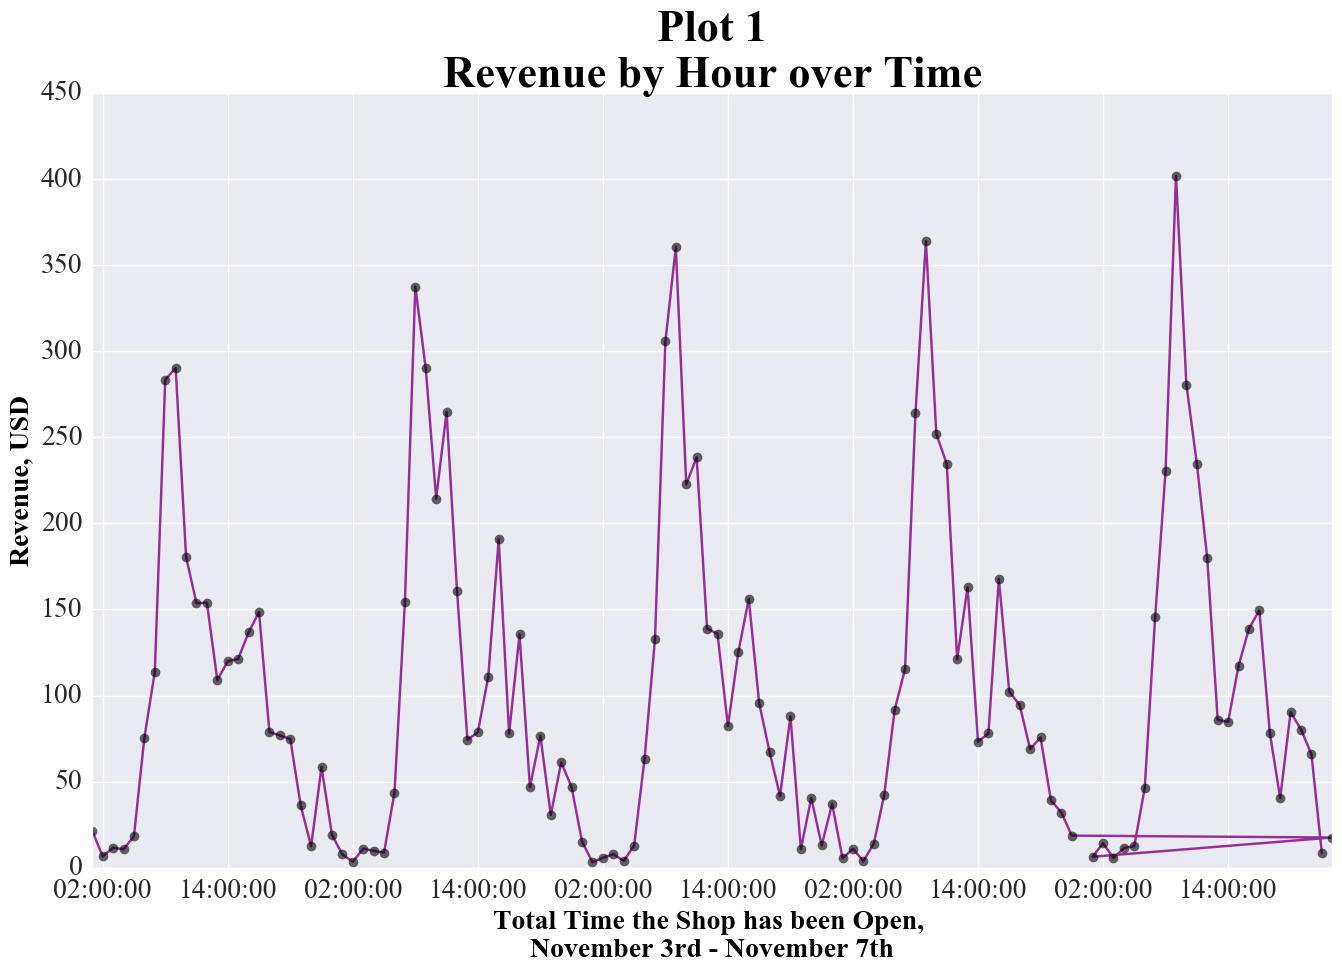

In [14]:
plt_format()

plt.plot(df['Date Time'], df.Revenue_by_hour, c='purple', alpha=0.8)
plt.plot(df['Date Time'], df.Revenue_by_hour, 'o', c='k', alpha=0.6)
plt.title('Plot 1\nRevenue by Hour over Time')
plt.xlabel('Total Time the Shop has been Open, \nNovember 3rd - November 7th')
plt.ylabel('Revenue, USD');

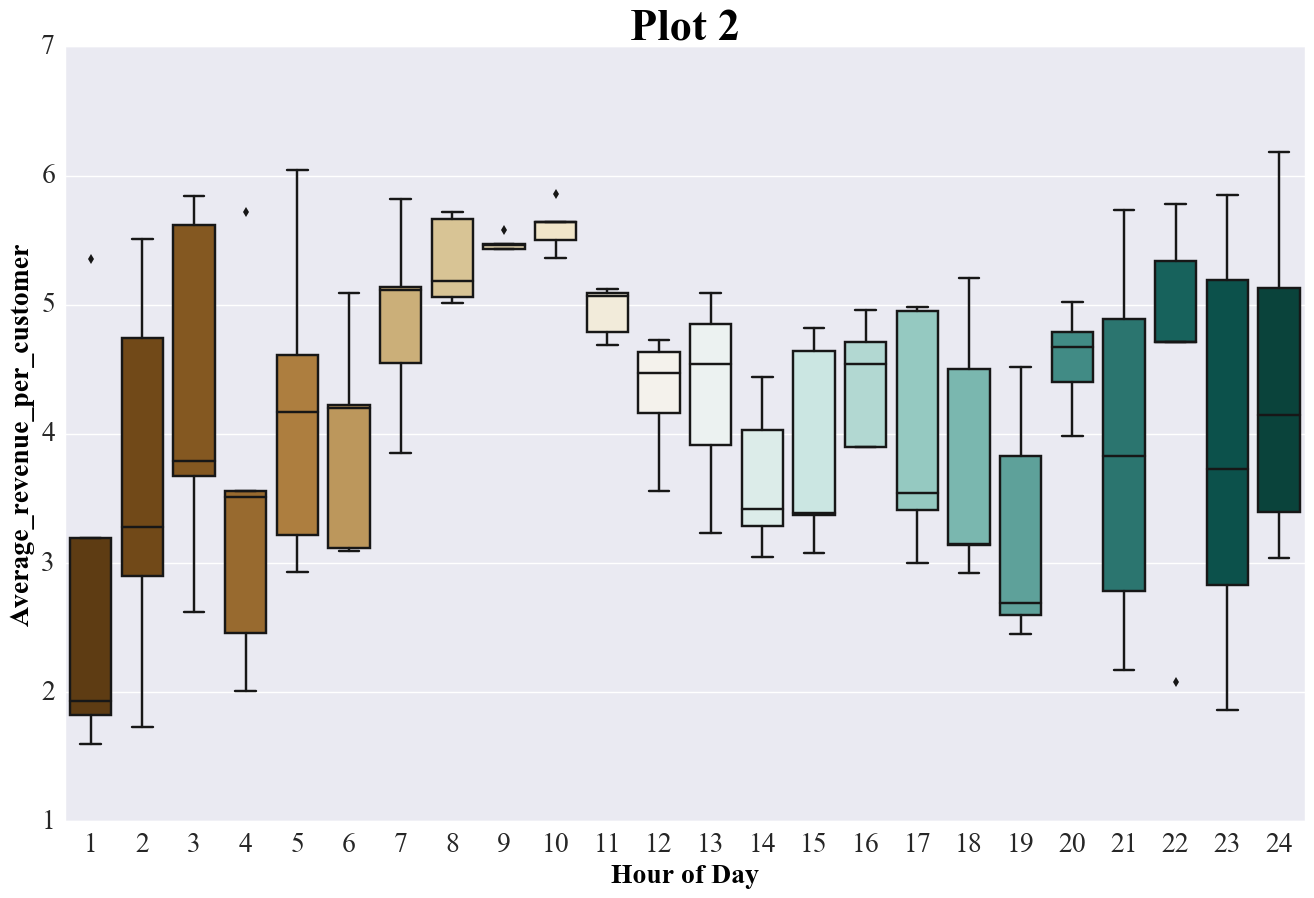

In [15]:
plt_format()

sns.boxplot(df['Hour of Day'], df.Average_revenue_per_customer, palette='BrBG')
plt.title('Plot 2');

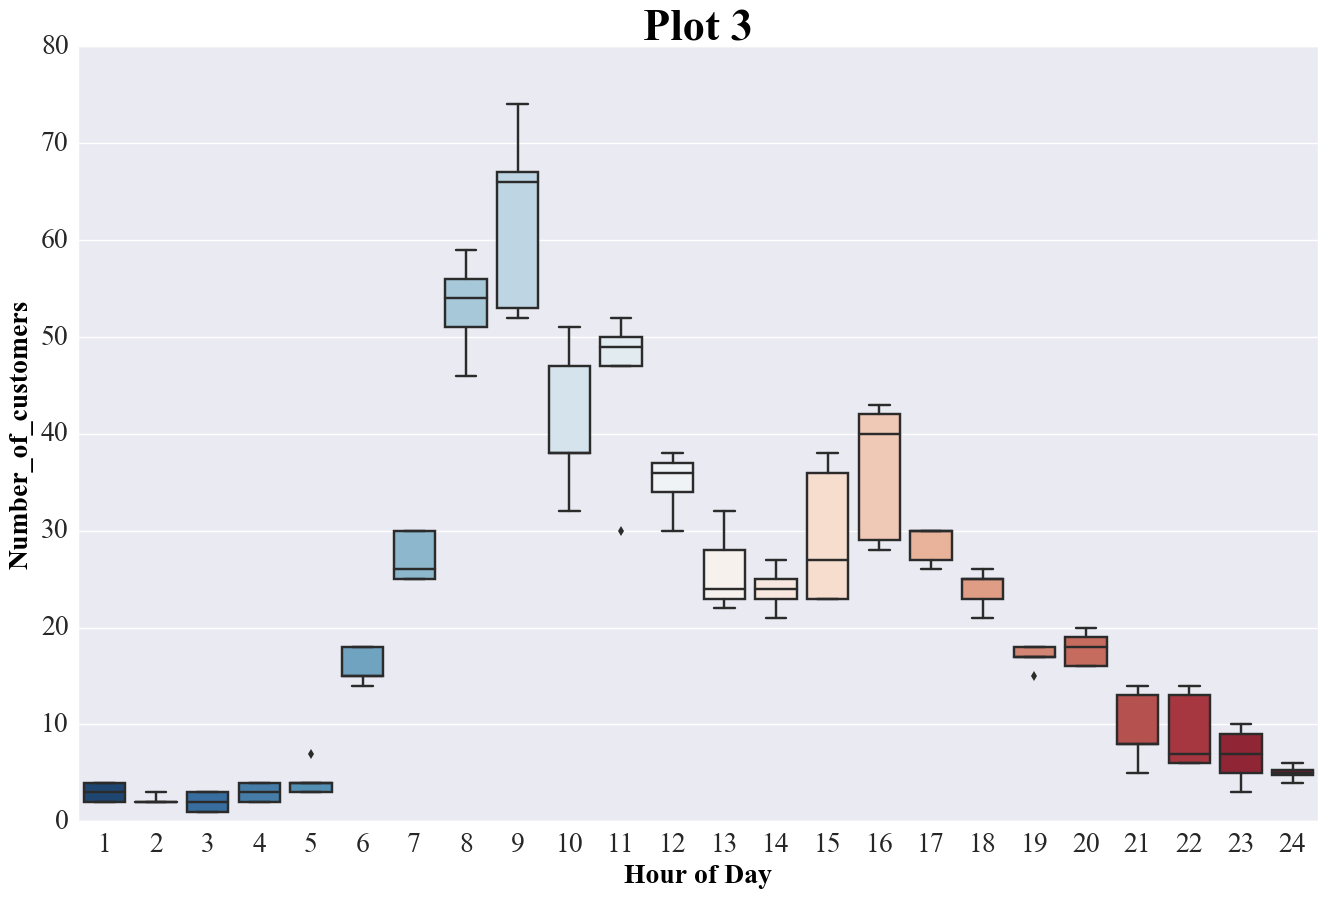

In [16]:
plt_format()

sns.boxplot(df['Hour of Day'], df['Number_of_customers'], palette="RdBu_r")
plt.title('Plot 3');

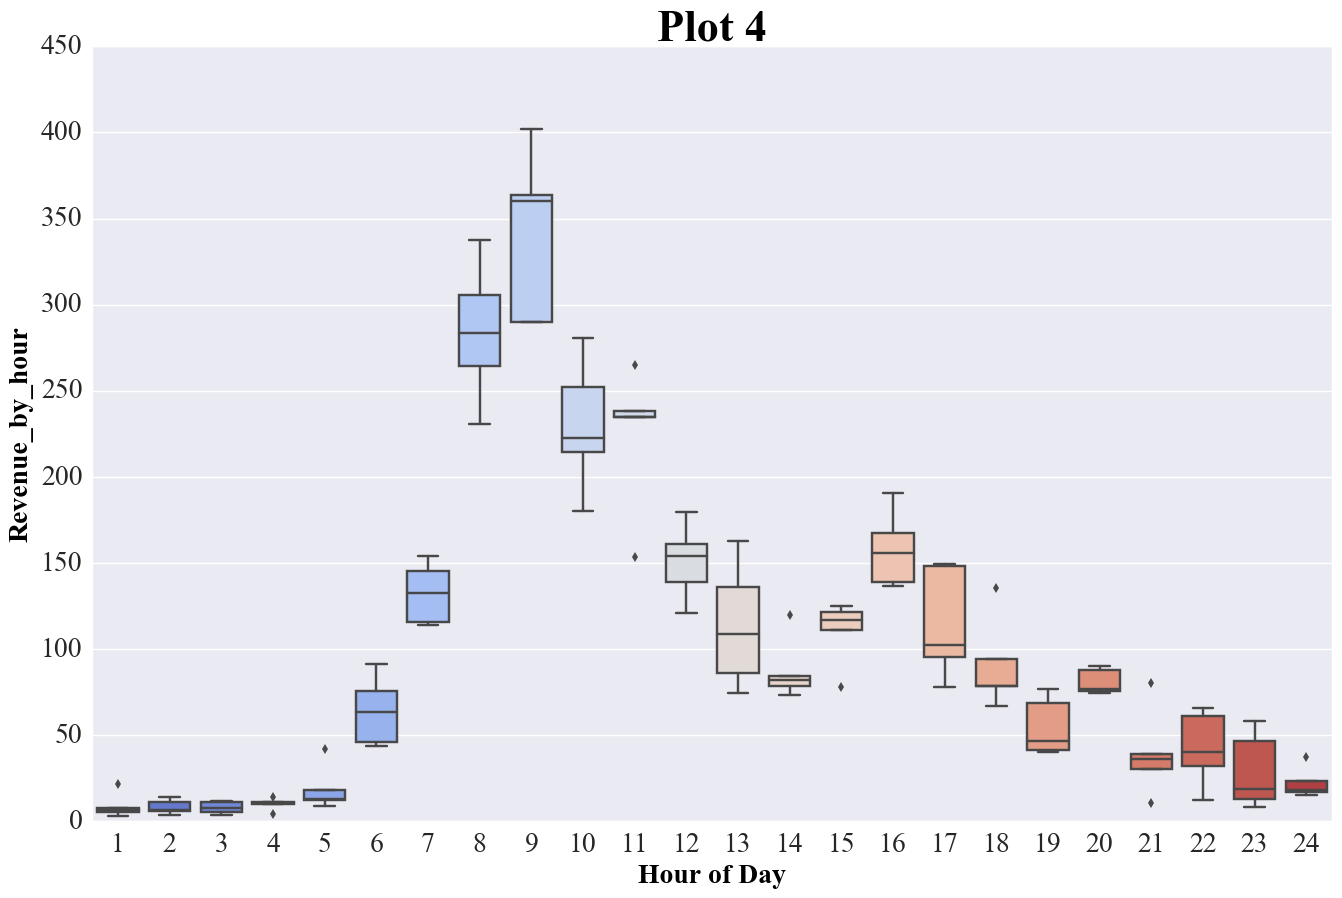

In [17]:
plt_format()

sns.boxplot(df['Hour of Day'], df['Revenue_by_hour'], palette='coolwarm')
plt.title('Plot 4');

### **Answer:**
  
I see four main trends in our first five days since opening the shop:  

 - Row #95 (#97 of excel worksheet) seems to be misdated.  It has a date of 11/8/2014 and 0:00, but it is out of order of the rest of the columns.  This is evidenced in both the slice of the dataframe above (rows 94-96) and in the first (line) plot where the line jumps ahead in time for one point and then jumps back.  
 - Each day, the revenue at the peak of the day is increasing.  This is noted by the progressively increasing spikes on the line-plot (Plot 1).  
 - Both the highest average spent and the least variation spent per customer is in the 9am and 10am hours.  This is evidenced in the first boxplot (Plot 2) where the boxes are the smallest and highest on the plot.
 - The highest number of customers pass through the doors in the 8am and 9am hours.  There is a second "rush" at 4pm, but this is much less noticeable and the average number of customers per hour generally tapers throughout the rest of the day.  This is evidenced by the second boxplot (Plot 3).  
 - The 9am hour is where the most revenue is generated each day.  This is evidenced by the highest box on the last boxplot (Plot 4).

---  
  
### **Question #1(b):**  
What might these trends say about consumer behavior?

### **Answer:** 
  
To me, this says a few things about customer behavior.  They see my pastry shop mostly as a breakfast option, and they are willing to spend consistently more at this time.  Perhaps we aren't catering to a big commuter crowd since we get half as many customers *and* revenue before 8am.  We are getting most people at the time of work starting and/or after dropping kids off at school.  
  
We are also stronger in the later afternoon vs. lunch time.  Perhaps we are appealing to the after-school crowd or those who need a sugar or caffeine boost to complete the day.

---  
  
## *-Part #2-*
Assuming you keep the same fixtures and power supplies – it costs \$10/hour to keep the store open. (Power the lights, appliances, etc.). It costs and additional \$20/hour to pay each employee, and you only ever need one employee at a time. The variable cost on each pastry sold – the ingredients, etc. - is about 30% of revenue.  
  
### **Question #2:**  
Which hours of the day tended to be profitable last week? Include your evidence.

In [18]:
## ADD A COLUMN FOR VARIABLE COST AND STORE EXPENSES:

df['Variable_cost'] = np.multiply(df.Revenue_by_hour, 0.30)
df['Store_expenses'] = 10 + 20
df['Total_loss_by_hour'] = df.Variable_cost + df.Store_expenses
df['Made_profit'] = df.Revenue_by_hour > df.Total_loss_by_hour
df.head()

,Date Time,Hour of Day,Number_of_customers,Average_revenue_per_customer,Revenue_by_hour,Variable_cost,Store_expenses,Total_loss_by_hour,Made_profit
0,2014-11-03 01:00:00,1,4,5.35,21.40,6.420,30,36.420,False
1,2014-11-03 02:00:00,2,2,3.28,6.56,1.968,30,31.968,False
2,2014-11-03 03:00:00,3,2,5.84,11.68,3.504,30,33.504,False
3,2014-11-03 04:00:00,4,3,3.56,10.68,3.204,30,33.204,False
4,2014-11-03 05:00:00,5,4,4.61,18.44,5.532,30,35.532,False


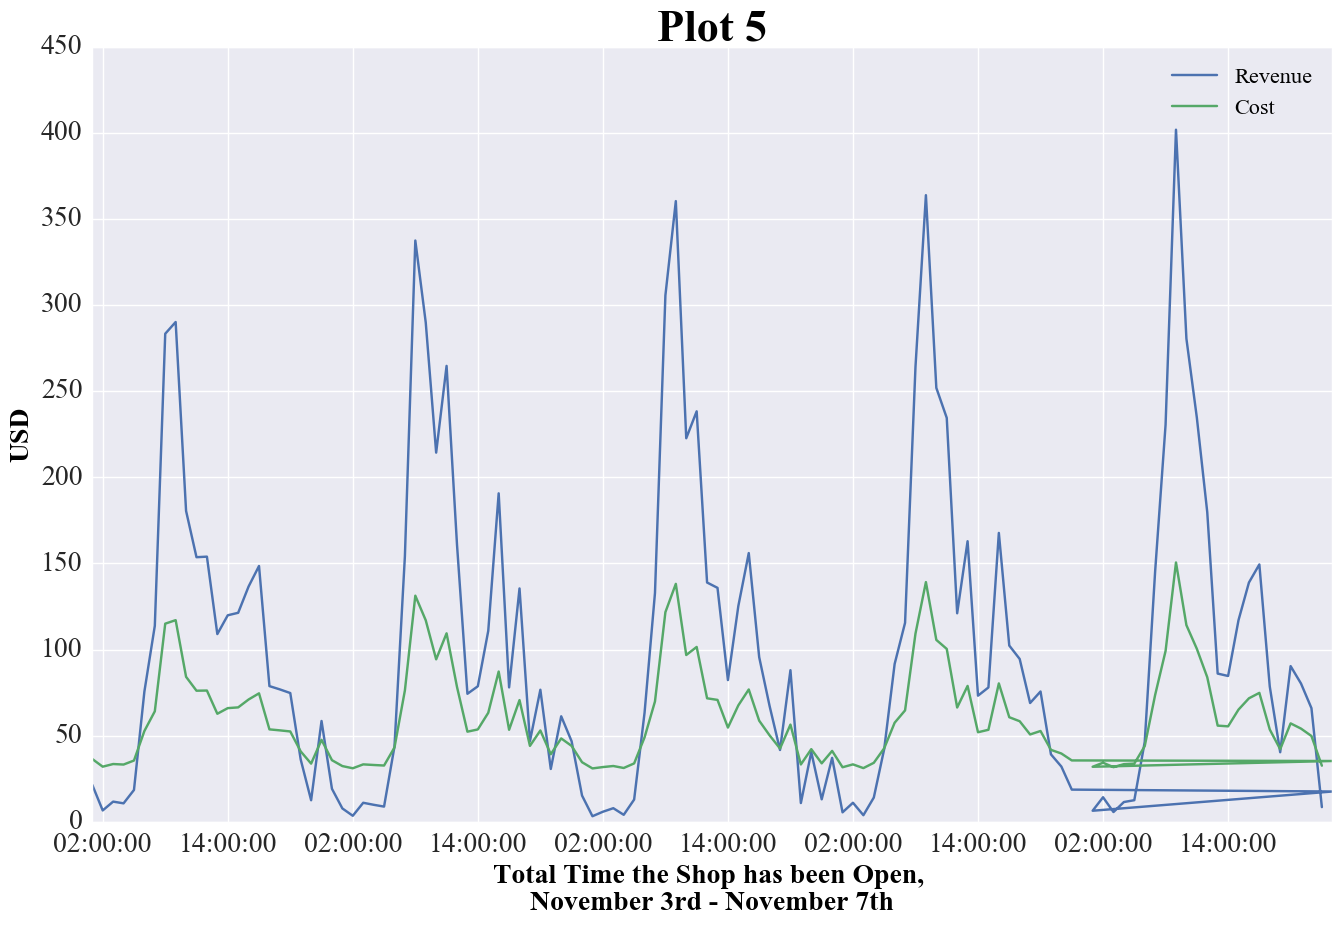

In [19]:
plt_format()

plt.plot(df['Date Time'], df.Revenue_by_hour, label='Revenue')
plt.plot(df['Date Time'], df.Total_loss_by_hour, label='Cost')
plt.title('Plot 5')
plt.xlabel('Total Time the Shop has been Open, \nNovember 3rd - November 7th')
plt.ylabel('USD')
plt.legend();

In [20]:
df2 = pd.concat([df.Made_profit, df['Hour of Day']], axis=1)
df2.groupby(['Hour of Day']).sum()

,Made_profit
Hour of Day,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,5.0
7,5.0
8,5.0
9,5.0


### **Answer:**  
  
6am to 6pm and 8pm were always profitable hours, see plot and table above.  7pm was also profitable more than half of the days.

---  
  
## *-Part #3-*
You have one employee who remains from the former business – Karl. Karl can work a maximum of 8 hours a day, although he may work less. (Note: Any lunch hour or other breaks given Karl do not count towards his 8-hour max).  
  
Karl expresses that he thinks he can attract more business if he uses some of his paid hours to promote the pastry shop around town. You agree that it would be worthwhile to test if promoting the business has a positive impact on sales.  
  
### **Question #3:**

Given that you want to maximize your profit, but given that you also want to
allow Karl to take some of his paid hours to promote the business and see if it has a positive
impact: What is your plan for how to decide what hours you should open the pastry shop?
(Assume Karl is your only employee - you are not able to work any hours at the shop, and you
may not hire an additional employee, at least in such a short term). Please be specific, and
justify your answer.

### **Answer:**  
  
Well, the 8am-11am time is when we get the most foot traffic and revenue, so Karl must be working in the store those hours.  I would also like to appeal to the slightly earlier crowd, so maybe Karl gets there at 7am and sets up and does some advertising out front to bring more people in.  
  
If Karl worked straight through the day for 8 hours, he'd be done by 3pm, and I really need him to be in the store for the 4pm rush.  I'm glad that Karl can be so flexible and take time off in the middle of the day for his break.  He should go out advertising from 11am-1pm sharp.  Then he can go take a break from 1pm-3pm and come back to finish his shift from 3pm-5pm.  
  
---  